In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import torch
from itertools import product
from tqdm import tqdm

from typing import Callable


/var/folders/_t/q2qhsxb97lj90dx67tklgrq40000gn/T/ipykernel_24774/3598615304.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


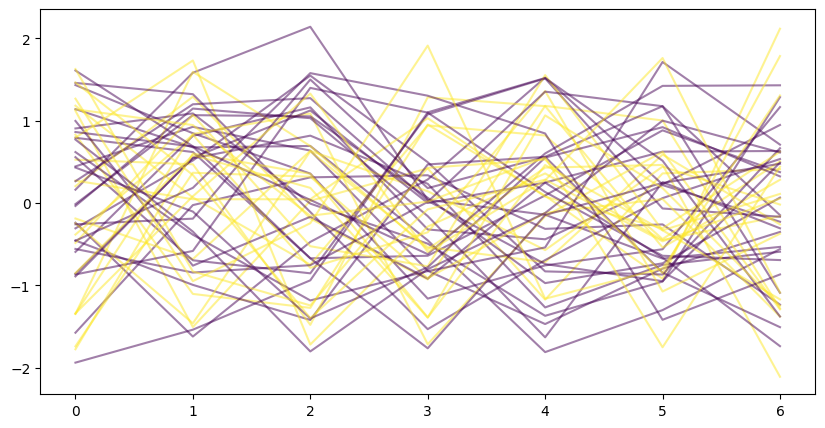

In [5]:
def save_splits(create_sample_func: Callable, data_kwargs: dict, data_dir: str, n_splits: dict) -> None:
    """Create and save train, val, and test splits of a dataset.

    Args:
        create_sample: Function that creates a sample from the dataset.
        n_splits: Dictionary with number of samples in each split.
        data_dir: Directory to save the splits.
    """
    for split, n_samples in n_splits.items():
        print(f"Creating {split} split...")

        x, y = create_sample_func(N = n_samples, **data_kwargs)

        split_dir = os.path.join(data_dir, split) 
        os.makedirs(split_dir, exist_ok=True)

        data_kwargs_name = '_'.join([f'{k}={v}' for k, v in data_kwargs.items()])

        np.save(os.path.join(split_dir, f'x_{data_kwargs_name}.npy'), x)
        np.save(os.path.join(split_dir, f'y_{data_kwargs_name}.npy'), y)

def create_flat(N: int, space_length: int, noise_std: float, y_low: int, y_high: int) -> tuple:
    """Create a sample from the flat dataset.

    Args:
        N: Number of samples to create.
        space_length: Length of the space.
        noise_std: Standard deviation of the noise.
        y_low: Lower bound of the y values.
        y_high: Upper bound of the y values.

    Returns:
        x: Array of shape (N, 1) with the x values.
        y: Array of shape (N, 1) with the y values.
    """
    x = np.linspace(0, 1, space_length).reshape(-1, 1)
    k = np.random.randint(y_low, y_high, size = (N,))
    # k = np.arange(y_low, y_high)
    # N = len(k)
    shift = np.random.randint(0, space_length, size = (N,))
    noise = np.random.normal(0, noise_std, size = (N, space_length))

    sins = np.sin(2*np.pi*x*k - shift).T

    sins_noised = sins + noise
    return sins_noised, k

data_kwargs = {
    'space_length': 7,
    'noise_std': 0.5,
    'y_low': 1,
    'y_high': 3,
}

x, y = create_flat(N = 50, **data_kwargs)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

fig, ax = plt.subplots(figsize=(10, 5))
cmap = plt.cm.get_cmap('viridis', 2)
for i in range(50):
    val = normalize(y[i], data_kwargs['y_low'], data_kwargs['y_high'])
    plt.plot(x[i], color = cmap(val), alpha = 0.5, linestyle = '-')
plt.show()

/var/folders/_t/q2qhsxb97lj90dx67tklgrq40000gn/T/ipykernel_20075/1302325486.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


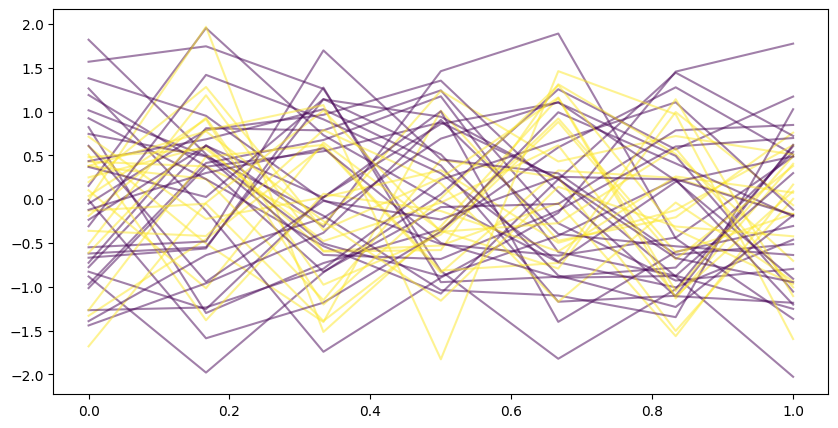

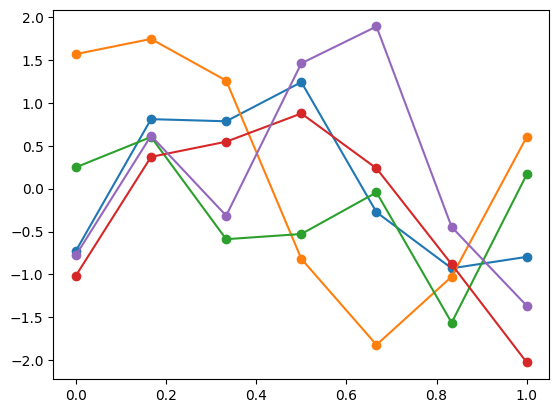

In [2]:
data_dir = '../data/flat/'


n_splits = {
    'train': 10_000,
    'val': 10_000,
    'test': 10_000,
}
data_kwargs = {
    'space_length': 7,
    'noise_std': 0.5,
    'y_low': 1,
    'y_high': 3,
}

# data_kwargs = {
#     'space_length': 100,
#     'noise_std': 0.0,
#     'y_low': 1,
#     'y_high': 3,
# }


for split, N in n_splits.items():

    space_length = data_kwargs['space_length']
    noise_std = data_kwargs['noise_std']
    y_low, y_high = data_kwargs['y_low'], data_kwargs['y_high']

    x = np.linspace(0, 1, space_length).reshape(-1, 1)
    k = np.random.randint(y_low, y_high, size = (N,))
    # k = np.arange(y_low, y_high)
    # N = len(k)
    shift = np.random.randint(0, space_length, size = (N,))
    noise = np.random.normal(0, noise_std, size = (N, space_length))

    sins = np.sin(2*np.pi*x*k - shift).T

    sins_noised = sins + noise

    split_dir = os.path.join(data_dir, split) 
    os.makedirs(split_dir, exist_ok=True)
    data_kwargs_name = '_'.join([f'{k}={v}' for k, v in data_kwargs.items()])

    # np.save(os.path.join(split_dir, f'x_{data_kwargs_name}.npy'), sins_noised)
    # np.save(os.path.join(split_dir, f'y_{data_kwargs_name}.npy'), k)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)


fig, ax = plt.subplots(figsize=(10, 5))
cmap = plt.cm.get_cmap('viridis', 2)
for i in range(50):
    val = normalize(k[i], y_low, y_high)
    plt.plot(x, sins_noised[i], color = cmap(val), alpha = 0.5, linestyle = '-')
plt.show()

plt.plot(x, sins_noised[:5].T, 'o', linestyle = '-')
# plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(y_low, y_high)), label='k', ax=ax)
plt.show()

## 2D

In [148]:
data_kwargs = {
    'space_length': 16,
    'noise_std': 0.5,
    'y_low': 1,
    'y_high': 5,
}
N = 15

space_length = data_kwargs['space_length']
noise_std = data_kwargs['noise_std']
y_low, y_high = data_kwargs['y_low'], data_kwargs['y_high']

In [149]:
x = np.linspace(0, 1, space_length)

xx, yy = np.meshgrid(x, x)
xx, yy = np.expand_dims(xx, -1), np.expand_dims(yy, -1)

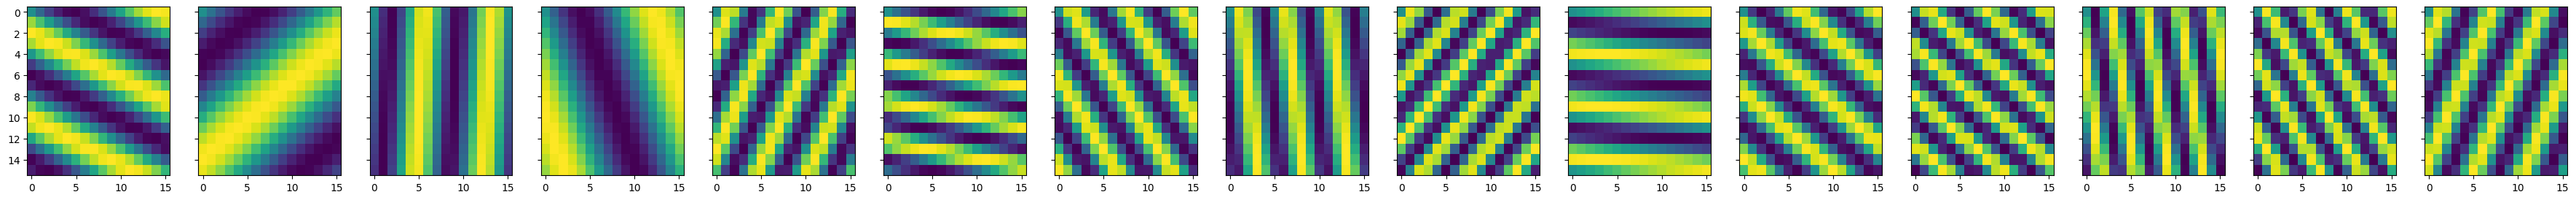

In [152]:
# kx, ky = np.random.randint(1, y_high, size = (N, 2)).T
# shiftx, shifty = shift = np.random.randint(0, space_length, size = (N,2)).T
# sins = np.sin(2*np.pi*kx*xx - shiftx + 2*np.pi*ky*yy - shifty).T

# N_plot = 15

# fig, axs = plt.subplots(1, N_plot, figsize = (N_plot*3, 3), sharey=True, sharex=True)
# for i in range(N_plot):
#     axs[i].imshow(sins[i], aspect='auto')
# plt.show()

# sins = torch.from_numpy(sins).unsqueeze(1).float()
# angles = torch.rand(N)*360

ks = np.random.randint(y_low, y_high, size = (N))
angles = np.random.uniform(low = 0, high = 360, size = (N))
x = np.linspace(0, 1, space_length)

xx, yy = np.meshgrid(x, x)
xx, yy = np.expand_dims(xx, -1), np.expand_dims(yy, -1)

sins = np.sin(2*np.pi*ks*(xx*np.cos(angles) + yy*np.sin(angles))).T

N_plot = 15

fig, axs = plt.subplots(1, N_plot, figsize = (N_plot*3, 3), sharey=True, sharex=True)
for i in range(N_plot):
    axs[i].imshow(sins[i], aspect='auto')
plt.show()

sins = torch.from_numpy(sins).unsqueeze(1).float()

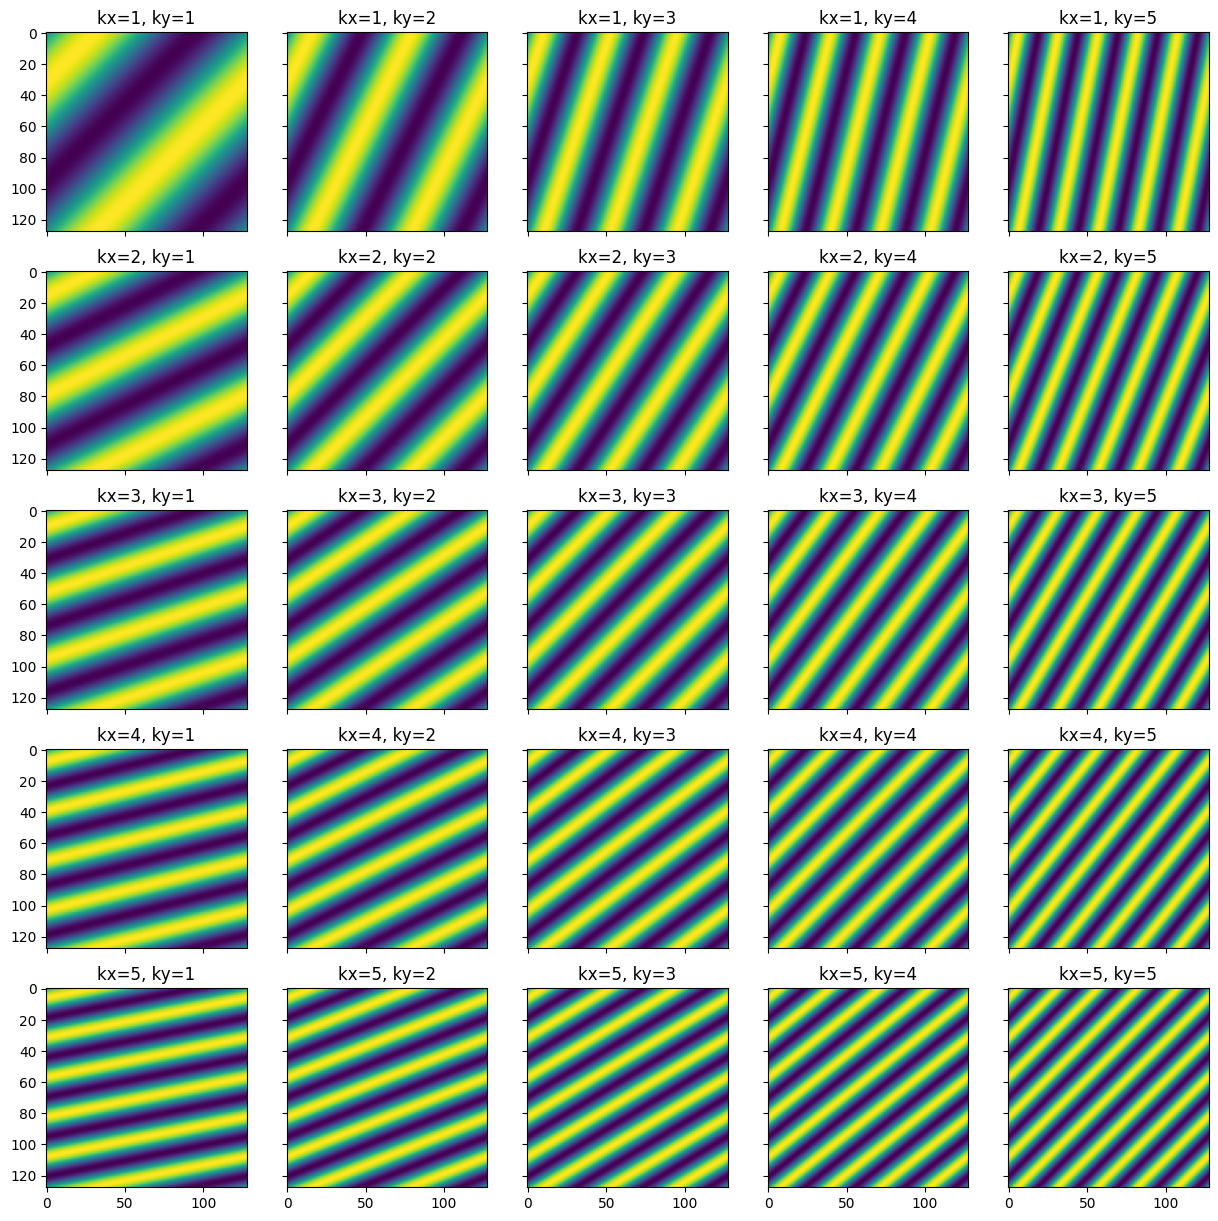

In [112]:
arange = np.arange(y_low, y_high+1)
kxs, kys = torch.tensor(list(product(arange, arange))).T

fig, axs = plt.subplots(len(arange), len(arange), figsize = (len(arange)*3, len(arange)*3), sharey=True, sharex=True)
axs = axs.flatten()
for i, (kx, ky) in enumerate(zip(kxs, kys)):
    sin = np.sin(2*np.pi*kx*xx + 2*np.pi*ky*yy).T.squeeze()
    axs[i].imshow(sin, aspect='auto')
    axs[i].set_title(f'kx={kx}, ky={ky}')

In [6]:
# from torch.utils.data import Dataset
# from torchvision.transforms import RandomRotation
# from torchvision.transforms import Pad
# from torchvision.transforms import Resize
# from torchvision.transforms import ToTensor
# from torchvision.transforms import Compose
# from tqdm.auto import tqdm
# from PIL import Image

# resize1 = Resize(87) # to upsample
# resize2 = Resize(29) # to downsample

# totensor = ToTensor()

In [78]:
from PIL import Image

# # Open the image file
# img = image_data = np.random.randn(28, 28) + 10
# original_image = Image.fromarray(img, mode='F')

# # Rotate the image by a specified angle (in degrees)
# angle_to_rotate = 10  # You can change this value to the desired rotation angle
# rotated_image = original_image.rotate(angle_to_rotate)
# img2 = np.array(rotated_image)

# fig, axs = plt.subplots(1, 2, figsize = (6, 3))
# axs[0].imshow(img, cmap='gray')#, interpolation='nearest')
# axs[1].imshow(img2, cmap='gray', vmin=-10, vmax=10)#, interpolation='nearest')
# plt.show()

In [8]:
import math

def rotatedRectWithMaxArea(w, angle):
  """
  Given a rectangle of size wxh that has been rotated by 'angle' (in
  radians), computes the width and height of the largest possible
  axis-aligned rectangle (maximal area) within the rotated rectangle.

  Adapted from: https://stackoverflow.com/questions/16702966/rotate-image-and-crop-out-black-borders
  """
  h = w
  if w <= 0 or h <= 0:
    return 0,0

  width_is_longer = w >= h
  side_long, side_short = (w,h) if width_is_longer else (h,w)

  # since the solutions for angle, -angle and 180-angle are all the same,
  # if suffices to look at the first quadrant and the absolute values of sin,cos:
  sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))
  if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
    # half constrained case: two crop corners touch the longer side,
    #   the other two corners are on the mid-line parallel to the longer line
    x = 0.5*side_short
    wr,hr = (x/sin_a,x/cos_a) if width_is_longer else (x/cos_a,x/sin_a)
  else:
    # fully constrained case: crop touches all 4 sides
    cos_2a = cos_a*cos_a - sin_a*sin_a
    wr,hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

  assert np.allclose(wr, hr), f'{wr} != {hr}'

  return wr

angles = np.arange(0, 90)
wrs = np.array([rotatedRectWithMaxArea(128, math.radians(angle)) for angle in angles])
assert angles[np.argmin(wrs)] == 45

In [41]:
from torchvision.transforms import RandomRotation, CenterCrop, Compose

In [94]:
kx, ky

(array([1, 2, 3, 1, 4, 3, 3, 4, 1, 1, 1, 4, 2, 2, 2]),
 array([4, 1, 2, 1, 2, 1, 2, 3, 3, 2, 1, 3, 3, 3, 2]))

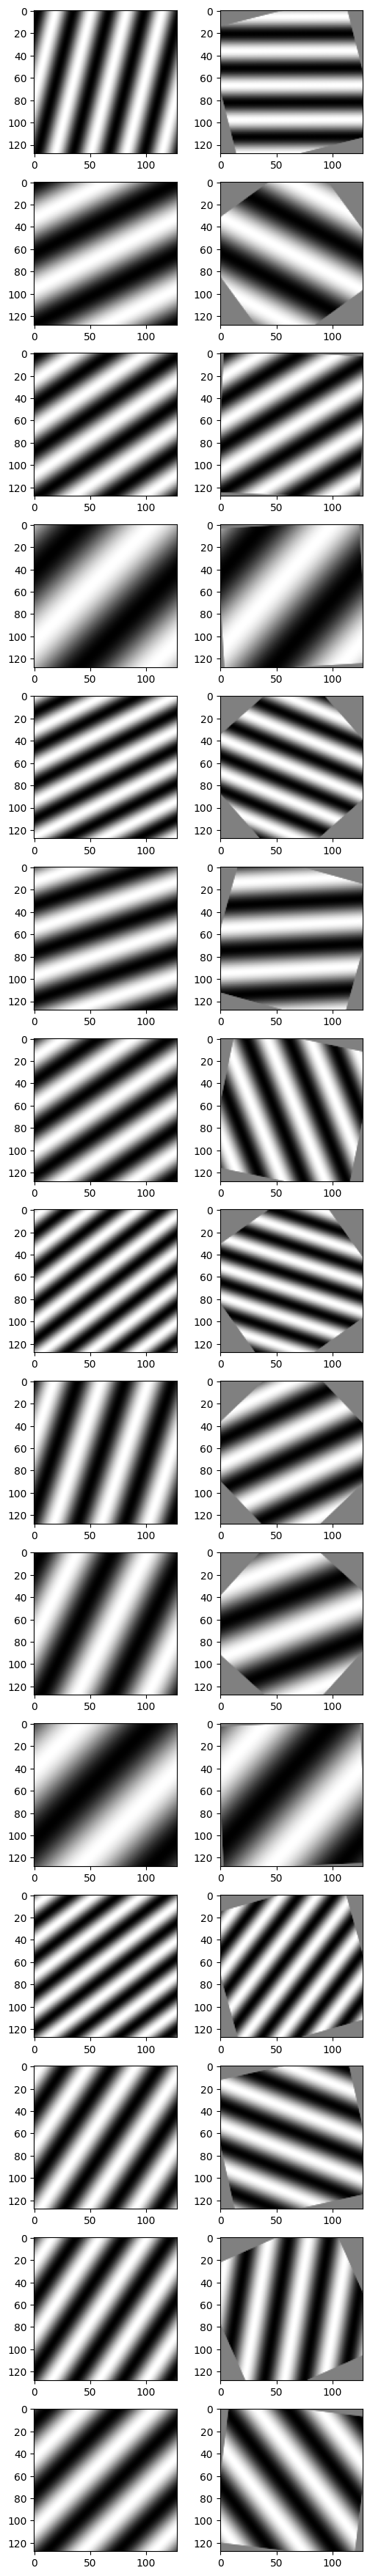

In [95]:
random_rotation = RandomRotation(degrees=180, fill = 0., interpolation=Image.BILINEAR)
s_min = int(rotatedRectWithMaxArea(space_length, math.radians(45)))
square_crop = CenterCrop(s_min)

transform = Compose([
    random_rotation,
    # square_crop,
])


sins_rotated = torch.stack([transform(sin) for sin in tqdm(sins, leave=False)]).squeeze(1)
sins_org = sins.squeeze(1)

N_plots = 15
fig, axs = plt.subplots(N_plots, 2, figsize = (6, 3*N_plots))
for i in range(N_plots):
    axs[i, 0].imshow(sins_org[i], cmap='gray')
    axs[i, 1].imshow(sins_rotated[i], cmap='gray')
plt.show()